In [8]:
import numpy as np
import scipy

import torch
from torch.utils.data import DataLoader

import librosa
from hyperparameters import *

from custom_datasets import VoxCelebDataset
from preprocessing import melspectrogram

from IPython.display import Audio
from matplotlib import pyplot as plt

from tqdm import tqdm_notebook as tqdm

from VGGish import vggish

import warnings
warnings.filterwarnings('ignore')

In [3]:
def random_crop(x, crop_size=96):
    i = np.random.randint(0, x.shape[1] - crop_size)
    return x[:, i:i+crop_size]

In [5]:
def show(audio):
    display(Audio(audio, rate=SAMPLE_RATE))

In [7]:
data[0][0]

array([[0.12445936, 0.08917635, 0.07351629, ..., 0.33332926, 0.33586082,
        0.3799155 ],
       [0.11607684, 0.09005748, 0.08578957, ..., 0.34324506, 0.3387541 ,
        0.30532624],
       [0.01837934, 0.05623765, 0.10178887, ..., 0.37062065, 0.36812989,
        0.26850644],
       ...,
       [0.2117243 , 0.19213021, 0.19675356, ..., 0.12483034, 0.1731581 ,
        0.03824699],
       [0.23885467, 0.19438409, 0.19625174, ..., 0.16024415, 0.17877034,
        0.16920915],
       [0.20861456, 0.16934811, 0.19655262, ..., 0.08828143, 0.2044419 ,
        0.15539404]])

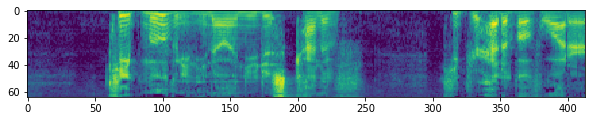

In [6]:
plt.figure(figsize=[10, 3])
plt.imshow(data[0][0])

In [9]:
data_loader = DataLoader(data, batch_size=16, num_workers=16)

In [10]:
for i in tqdm(data_loader):
    pass`

Process Process-19:
Process Process-18:
Process Process-20:
Process Process-24:
Traceback (most recent call last):
Process Process-33:
Process Process-26:
Traceback (most recent call last):
Process Process-32:
Process Process-31:
Process Process-27:
  File "/data/anaconda/envs/py35/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
Process Process-21:
Process Process-29:
  File "/data/anaconda/envs/py35/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/data/anaconda/envs/py35/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/data/anaconda/envs/py35/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):


KeyboardInterrupt: 

  File "/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
Process Process-28:
  File "/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/data/home/kst179/large_data/speech/custom_datasets.py", line 30, in __getitem__
    record = self.transform(record)
Traceback (most recent call last):
Traceback (most recent call last):
  File "<ipython-input-2-64e4a7170ddb>", line 2, in transform
    x = melspectrogram(x)
Traceback (most recent call last):
  File "/data/anaconda/envs/py35/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/data/anaconda/envs/py35/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/data/home/kst179/large_dat

  File "/data/home/kst179/large_data/speech/custom_datasets.py", line 30, in __getitem__
    record = self.transform(record)
  File "/data/home/kst179/large_data/speech/preprocessing.py", line 29, in melspectrogram
    S = np.abs(stft(pre_emphasis(y)))
Traceback (most recent call last):
  File "/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/data/home/kst179/large_data/speech/custom_datasets.py", line 30, in __getitem__
    record = self.transform(record)
  File "<ipython-input-2-64e4a7170ddb>", line 2, in transform
    x = melspectrogram(x)
  File "<ipython-input-2-64e4a7170ddb>", line 2, in transform
    x = melspectrogram(x)
  File "/data/anaconda/envs/py35/lib/python3.5/site-packages/librosa/core/spectrum.py", line 185, in stft
    axis=0)[:stft_matrix.shape[0]]
  File "/data/anaconda/envs/py35/lib/python3.5/multiprocessing/process.py", line 252, in _

In [9]:
net = vggish(include_classifier=True, pretrained=True)

In [10]:
net

VGGish(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=12288, out